# Projeto de geometria de torre 230 kV
Comparação entre critérios de norma

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from math import degrees, radians, sin, cos, sqrt
from normaslt.geral import plot_dimension

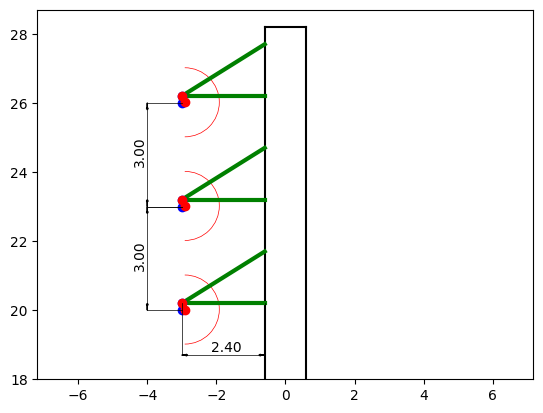

In [19]:
# Teste plotagem - torre 230 kV circuito duplo

# Posição das fases
xr = 3
x1a = -xr
x2a = -xr
x3a = -xr
x1b = xr
x2b = xr
x3b = xr
# Alturas relativas à fase mais baixa
y1a = 0.
y2a = 3.
y3a = 6.
y1b = 0.
y2b = 3.
y3b = 6.
hm = 1.5 # Altura da ancoragem do isolador de suspensao em relacao ao do line post
alfa = radians(10.) # Angulo vertical do isolador line post
lc = 0.2 # Comprimento da ferragem (m)
f = 10. # Flecha (m)
h = 10. # clearance (m)
# Ângulos de balanço
ang1 = radians(25.)
ang2 = radians(45.)
hbase = h + f + lc
y1t = y1a+hbase
y2t = y2a+hbase
y3t = y3a+hbase

# Estrutura
ltsup = 1.2
ltinf = 1.2
ht = y3t + hm + 0.5

plt.figure()
# Estrutura metalica
plt.plot([-ltinf/2, -ltsup/2], [0, ht],'k-')
plt.plot([ltinf/2, ltsup/2], [0, ht],'k-')
plt.plot([-ltsup/2, ltsup/2], [ht, ht],'k-')
# Misulas
plt.plot([-ltsup/2, x1a], [y1t, y1t],'g-', linewidth=3)
plt.plot([-ltsup/2, x2a], [y2t, y2t],'g-', linewidth=3)
plt.plot([-ltsup/2, x3a], [y3t, y3t],'g-', linewidth=3)
plt.plot([-ltsup/2, x1a], [y1t+hm, y1t],'g-', linewidth=3)
plt.plot([-ltsup/2, x2a], [y2t+hm, y2t],'g-', linewidth=3)
plt.plot([-ltsup/2, x3a], [y3t+hm, y3t],'g-', linewidth=3)
# Solo
plt.plot([-4.5, 4.5], [0, 0],'k-', linewidth=0.5)
plt.plot([x1a, x1a], [y1t, y1t-lc],'bo-')
plt.plot([x2a, x2a], [y2t, y2t-lc],'bo-')
plt.plot([x3a, x3a], [y3t, y3t-lc],'bo-')
plt.plot([x1a, x1a], [y1t-0.2, y1t-lc+0.2],'r-')
plt.plot([x2a, x2a], [y2t-0.2, y2t-lc+0.2],'r-')
plt.plot([x3a, x3a], [y3t-0.2, y3t-lc+0.2],'r-')
plt.plot([x1a, x1a+lc*sin(ang1)], [y1t, y1t-lc*cos(ang1)],'ro-')
plt.plot([x2a, x2a+lc*sin(ang1)], [y2t, y2t-lc*cos(ang1)],'ro-')
plt.plot([x3a, x3a+lc*sin(ang1)], [y3t, y3t-lc*cos(ang1)],'ro-')
plt.gca().add_patch(patches.Arc((x1a, y1t), 2*lc, 2*lc, theta1=-90., theta2=degrees(ang1)-90.,lw=0.5,color='r'))
plt.gca().add_patch(patches.Arc((x2a, y2t), 2*lc, 2*lc, theta1=-90., theta2=degrees(ang1)-90.,lw=0.5,color='r'))
plt.gca().add_patch(patches.Arc((x3a, y3t), 2*lc, 2*lc, theta1=-90., theta2=degrees(ang1)-90.,lw=0.5,color='r'))
# Espaçamentos
dist1 = 1.
dist2 = 2.
plt.gca().add_patch(patches.Arc((x1a+lc*sin(ang1), y1t-lc*cos(ang1)), 2*dist1, 2*dist1, theta1=-90., theta2=90.,lw=0.5,color='r'))
plt.gca().add_patch(patches.Arc((x2a+lc*sin(ang1), y2t-lc*cos(ang1)), 2*dist1, 2*dist1, theta1=-90., theta2=90.,lw=0.5,color='r'))
plt.gca().add_patch(patches.Arc((x3a+lc*sin(ang1), y3t-lc*cos(ang1)), 2*dist1, 2*dist1, theta1=-90., theta2=90.,lw=0.5,color='r'))

# teste de cota
plot_dimension(plt, (x1a,y1t-lc), (x2a,y2t-lc), offset=1)
plot_dimension(plt, (x2a,y2t-lc), (x3a,y3t-lc), offset=1)
plot_dimension(plt, (x1a,y1t), (-ltsup/2,y1t), offset=-1.5)
plt.axis('equal')
plt.gca().set_ylim(18, ht+0.5)
plt.show()

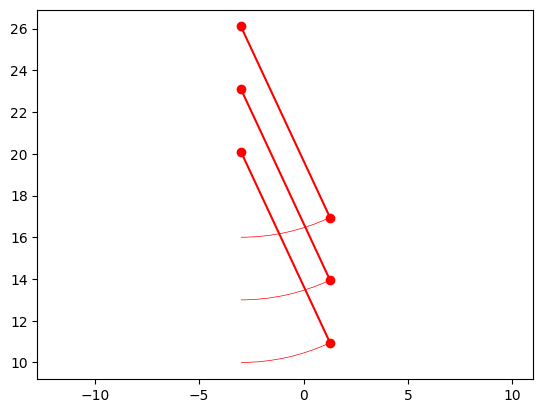

In [3]:
# Meio do vão
y1mv = y1a + h
y2mv = y2a + h
y3mv = y3a + h
l = f + lc
plt.figure()
plt.plot([x1a, x1a+l*sin(ang1)], [y1t, y1t-l*cos(ang1)],'ro-')
plt.plot([x2a, x2a+l*sin(ang1)], [y2t, y2t-l*cos(ang1)],'ro-')
plt.plot([x3a, x3a+l*sin(ang1)], [y3t, y3t-l*cos(ang1)],'ro-')
plt.gca().add_patch(patches.Arc((x1a, y1t), 2*l, 2*l, theta1=-90., theta2=degrees(ang1)-90.,lw=0.5,color='r'))
plt.gca().add_patch(patches.Arc((x2a, y2t), 2*l, 2*l, theta1=-90., theta2=degrees(ang1)-90.,lw=0.5,color='r'))
plt.gca().add_patch(patches.Arc((x3a, y3t), 2*l, 2*l, theta1=-90., theta2=degrees(ang1)-90.,lw=0.5,color='r'))
plt.axis('equal')
plt.show()